## Intercambio de calor en tanques en serie
### Solución dun sistema de ecuación diferenciais ordinarias simultáneas. 
#### Balances de enerxía en estado non estacionario, resposta dinámica de unha serie de tanques axitados de mestura perfecta.
  
Úsanse tres tanques en serie para requentar unha mestura  multicomponente de disolventes antes de metela coma alimentación duna columna de destilación, tal como se amosa na figura. Cada tanque contén, inicialmente, 1000 kg da mestura a 20 °C. En cada serpentín de cada tanque condensa un vapor saturado á temperatura de 250 °C. A mestura entra no primeiro tanque a razón de 100 kg/min e desborda no segundo e no terceiro tanque co mesmo fluxo. A temperatura á que a mestura entra no primeiro tanque é de 20 °C. Os tanque son de mestura perfecta, polo que a temperatura dentro deles pódese considerar constante e á súa vez igual á temperatura de saída da mestura do tanque en cuestión
  
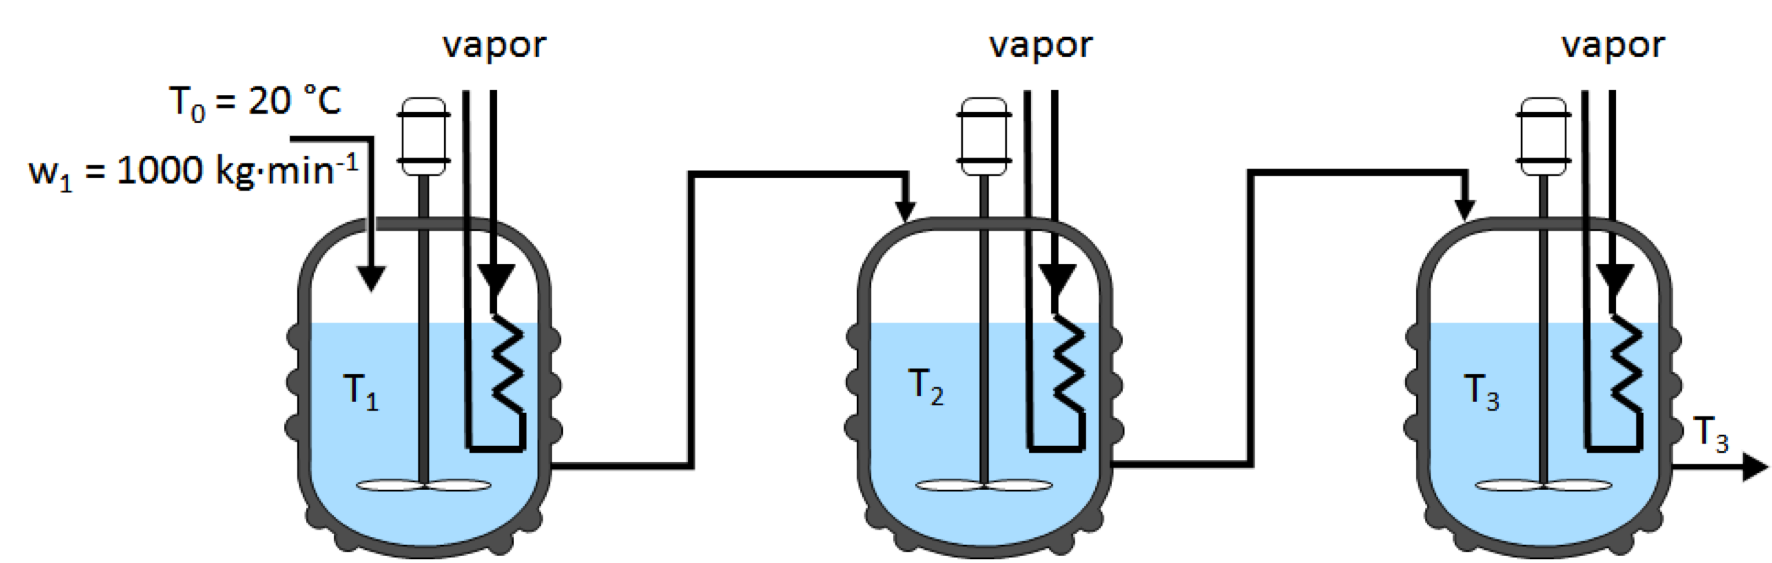
  
 A capacidade calorífica da mestura, $C_P$, é de 2,0 kJ⋅kg-1. Para cada tanque en particular, a velocidade á que o calor é transferido do vapor á mestura de disolventes ven dada pola expresión:
  
$$
Q = UA \left ( T_{vapor} - T \right)  
$$
  
onde:  
$UA$ = 10 kJ⋅min-1⋅°C-1 é o produto do coeficiente de transmisión de calor e o área do serpentín de cada tanque  
$T$ = temperatura da mestura de disolventes no tanque, en °C  
$Q$ = velocidade de transmisión de calor en kJ⋅min-1.

Pódese realizar un balance individual de materia e enerxía para cada tanque. Nestes balances, o fluxo másico permanece constante, polo que F = F1 = F2 = F3. A masa de cada tanque pódese supor constante así coma o volume do tanque e a densidade da mestura de disolventes. Deste xeito M = M1 = M2 = M3. Para cada tanque, o balance de enerxía xenérico pódese representar por:
  
$$
ACUMULACIÓN = ENTRADA - SAÍDA
$$
  
polo que:
  
$$
MC_P \frac {dT_1} {dt} = W C_P T_0 + UA \left ( T_{vapor} - T_1 \right ) - W C_P T_1
$$
  
Obsérvese que o balance de materia en estado non estacionario non é necesario para ningún dos tanques xa que a masa neles non cambia co tempo. A ecuación anterior se pode arranxar e resolver explicitamente e expresala no xeito habitual das ecuacións diferenciais ordinarias:

Primeiro tanque:
  
$$
\frac {dT_1} {dt} = \frac {W C_P \left ( T_0 - T_1 \right ) + U A \left ( T_{vapor} - T_1 \right )} {M C_P} 
$$
  
Segundo tanque:
  
$$
\frac {dT_2} {dt} = \frac {W C_P \left ( T_1 - T_2 \right ) + U A \left ( T_{vapor} - T_2 \right )} {M C_P} 
$$
  
Terceiro tanque:
  
$$
\frac {dT_3} {dt} = \frac {W C_P \left ( T_2 - T_3 \right ) + U A \left ( T_{vapor} - T_3 \right )} {M C_P} 
$$
  
1.	Determina-las temperaturas de cada tanque en réxime estacionario. 
2.	Que tempo descorre para que a temperatura do tanque 3 acade un valor do 99% da estacionaria durante o quentamento?.





In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

In [10]:
# función de retorno de dT/dt
Tvapor = 250.0  # C
T0     = 20.0   # C
CP     = 2.0    # 
UA      = 10.0   # kJ min-1 C-1
W       = 100.0 # kg/min
M       = 1000.0  # kg

def modelo(T,t):
    dTdt = ( W * CP * (T0 - T ) + UA * (Tvapor - T) ) / ( M * CP )
    return dTdt

In [11]:
# initial condition
T0 = 20

# time points
t = np.linspace(0,100,num=50)

In [14]:
# solve ODE
T = odeint(modelo,T0,t)

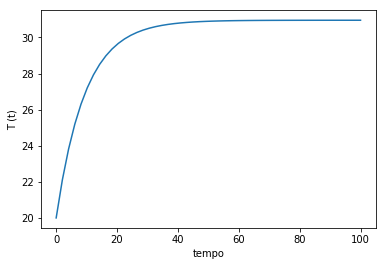

In [15]:
# plot results
plt.plot(t,T)
plt.xlabel('tempo')
plt.ylabel('T (t)')
plt.show()

In [16]:
def modelo1(T,t):
    T1,T2,T3 = T
    dT1dt = ( W * CP * (T0 - T1) + UA * (Tvapor - T1) ) / ( M * CP )
    dT2dt = ( W * CP * (T1 - T2) + UA * (Tvapor - T2) ) / ( M * CP )
    dT3dt = ( W * CP * (T2 - T3) + UA * (Tvapor - T3) ) / ( M * CP )
    return [dT1dt,dT2dt,dT3dt]

In [17]:
# initial condition
T0 = 20
# time points
t = np.linspace(0,100,num=50)
# solve ODE
T = odeint(modelo1,[T0,T0,T0],t)

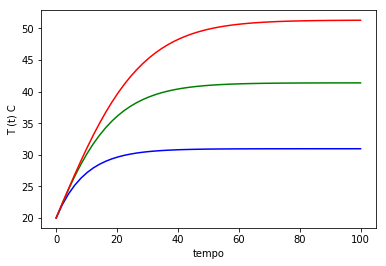

In [18]:
# plot results
plt.plot(t,T[:,0],'b-',t,T[:,1],'g-',t,T[:,2],'r-')
plt.xlabel('tempo')
plt.ylabel('T (t) C')
plt.show()

In [27]:
T 

array([[20.        , 20.        , 20.        ],
       [22.1125198 , 22.32039042, 22.33427522],
       [23.81757211, 24.54118867, 24.63602677],
       [25.1937501 , 26.61448687, 26.88827525],
       [26.30448776, 28.51456385, 29.070745  ],
       [27.20098391, 30.23110788, 31.1639012 ],
       [27.92456182, 31.7642301 , 33.15113841],
       [28.50857443, 33.12082641, 35.01976748],
       [28.97994137, 34.3119567 , 36.76124287],
       [29.36038998, 35.3509817 , 38.37094173],
       [29.66745681, 36.25226393, 39.84769883],
       [29.91529589, 37.03028424, 41.19323415],
       [30.11533121, 37.69906177, 42.41155914],
       [30.27678326, 38.27179339, 43.50841267],
       [30.40709407, 38.76064931, 44.49075545],
       [30.51227024, 39.17667812, 45.36633532],
       [30.59715982, 39.52978671, 46.14332654],
       [30.66567569, 39.8287698 , 46.83004005],
       [30.72097607, 40.08137014, 47.43469819],
       [30.76560998, 40.29435734, 47.9652658 ],
       [30.80163479, 40.47361509, 48.429